<a href="https://colab.research.google.com/github/jawedcodes/AI-Thinks-Personality-Traits-from-Selfies/blob/main/AI_personality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json file here

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"jawedali","key":"bbef57f9e8b0339500718be429f85264"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d khushikyad001/ai-thinks-personality-traits-from-selfies

Dataset URL: https://www.kaggle.com/datasets/khushikyad001/ai-thinks-personality-traits-from-selfies
License(s): MIT
ai-thinks-personality-traits-from-selfies.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip ai-thinks-personality-traits-from-selfies

Archive:  ai-thinks-personality-traits-from-selfies.zip
replace ai_personality_selfie_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/ai_personality_selfie_dataset.csv")

In [ ]:
df.head(3)

,image_id,user_selfie,extroversion_score,confidence_level,trustworthiness_score,smile_intensity,eye_contact_score,model_used,age_range,gender,emotion_category
0,img_000.jpg,https://syntheticfaces.ai/img_000.jpg,0.62,0.60,0.56,0.52,0.41,CLIP-ViT-B/32 + GPT-4V,25-34,Other,Neutral
1,img_001.jpg,https://syntheticfaces.ai/img_001.jpg,0.25,0.58,0.74,0.10,0.15,CLIP-ViT-B/32 + GPT-4V,18-24,Female,Surprised
2,img_002.jpg,https://syntheticfaces.ai/img_002.jpg,0.33,0.27,0.14,0.86,0.48,CLIP-ViT-B/32 + GPT-4V,45-54,Male,Surprised


In [ ]:
df.shape

(20, 11)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image_id               20 non-null     object 
 1   user_selfie            20 non-null     object 
 2   extroversion_score     20 non-null     float64
 3   confidence_level       20 non-null     float64
 4   trustworthiness_score  20 non-null     float64
 5   smile_intensity        20 non-null     float64
 6   eye_contact_score      20 non-null     float64
 7   model_used             20 non-null     object 
 8   age_range              20 non-null     object 
 9   gender                 20 non-null     object 
 10  emotion_category       20 non-null     object 
dtypes: float64(5), object(6)
memory usage: 1.8+ KB


In [ ]:
df['age_range'].unique()

array(['25-34', '18-24', '45-54', '35-44', '55+'], dtype=object)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

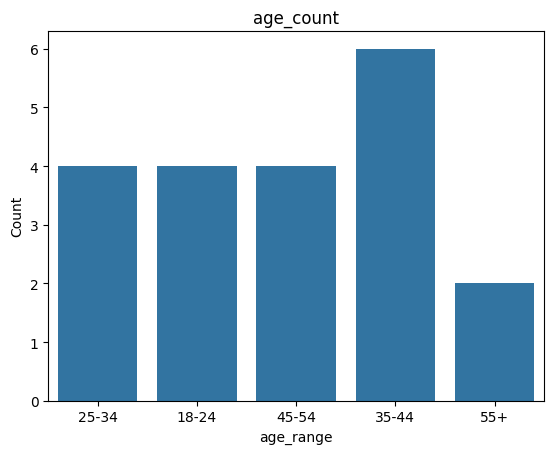

In [ ]:
# Create a count plot for the
sns.countplot(x='age_range', data=df)

# Add title and labels
plt.title('age_count')
plt.xlabel('age_range')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

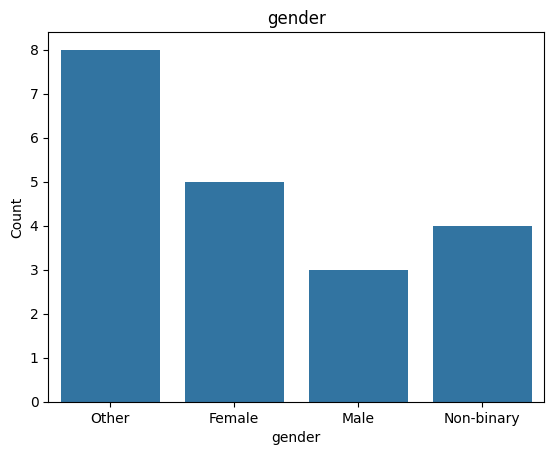

In [ ]:
# Create a count plot for the
sns.countplot(x='gender', data=df)

# Add title and labels
plt.title('gender')
plt.xlabel('gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

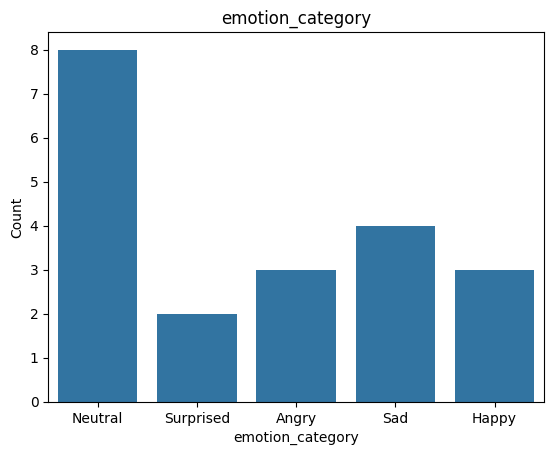

In [ ]:
# Create a count plot for the
sns.countplot(x='emotion_category', data=df)

# Add title and labels
plt.title('emotion_category')
plt.xlabel('emotion_category')
plt.ylabel('Count')

In [ ]:
numeric_data = df.select_dtypes(include='float64')
corr_matrix = numeric_data.corr()

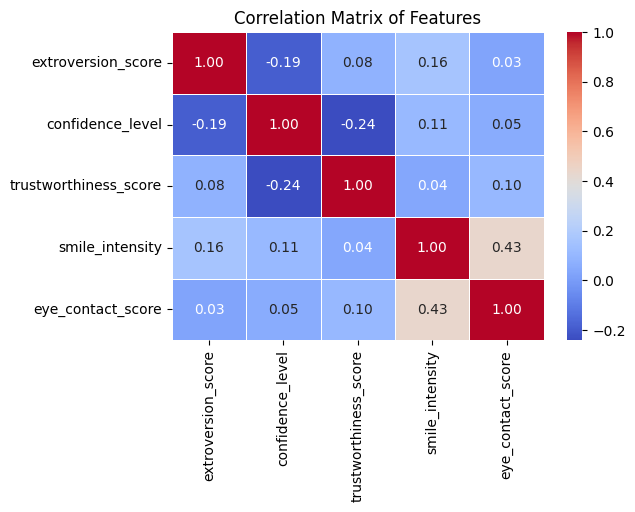

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Features')
plt.show()
#smile_intensity and eye contact has more similarity.
#extroversion_score and smile_intensity has small relation.

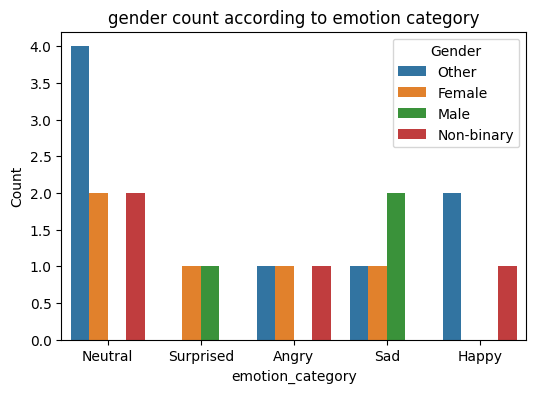

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='emotion_category', hue='gender')

# Add title and labels
plt.title('gender count according to emotion category')
plt.xlabel('emotion_category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

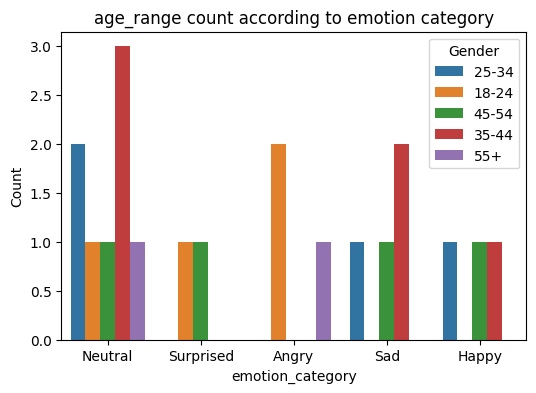

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='emotion_category', hue='age_range')

# Add title and labels
plt.title('age_range count according to emotion category')
plt.xlabel('emotion_category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()
#35-44 age range people are neutral or sad most of them, very less are happy.
#18-24 age group of people are mostly angry.
#intersting fact came from this graph is that after 25 till 55 people are happy before that and after that their is no graph showing
#their happiness.

In [ ]:
# Create pair plot
#sns.pairplot(numeric_data, diag_kind='kde', palette='husl')

# Show plot
#plt.figure(figsize=(6,4))
#plt.show()

In [ ]:
import numpy as np

In [ ]:
print(df[df["confidence_level"] > np.mean(df['confidence_level'])][["confidence_level", "emotion_category"]].head())
#people with normal level of cofidence what's their emotion type.

   confidence_level emotion_category
0              0.60          Neutral
1              0.58        Surprised
3              0.75            Angry
7              0.93            Happy
9              0.96            Angry


In [ ]:
print(df[df["trustworthiness_score"] > np.mean(df['trustworthiness_score'])][["trustworthiness_score", "emotion_category"]].head())


    trustworthiness_score emotion_category
0                    0.56          Neutral
1                    0.74        Surprised
4                    0.91          Neutral
5                    0.67              Sad
10                   0.79              Sad


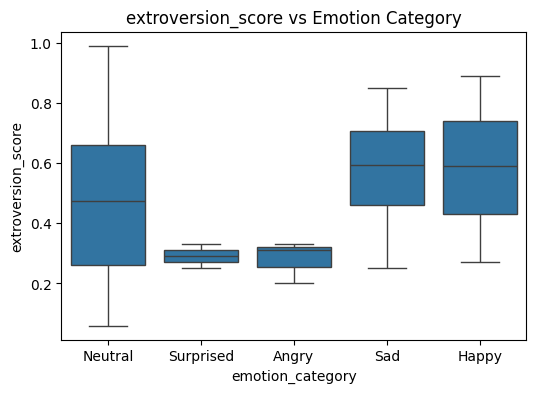

**************************************************************************


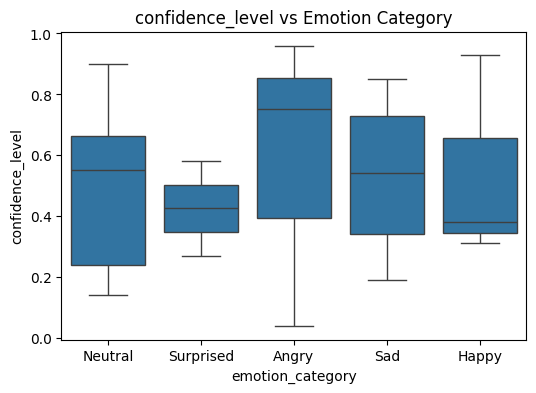

**************************************************************************


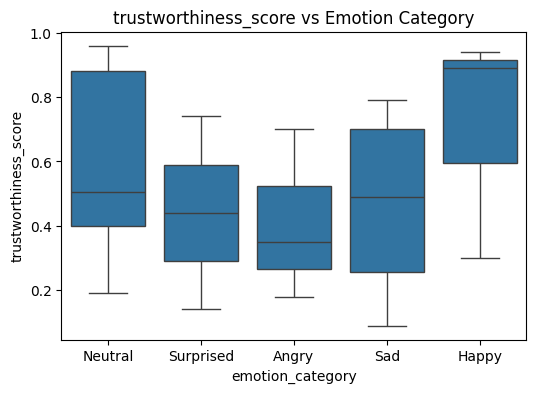

**************************************************************************


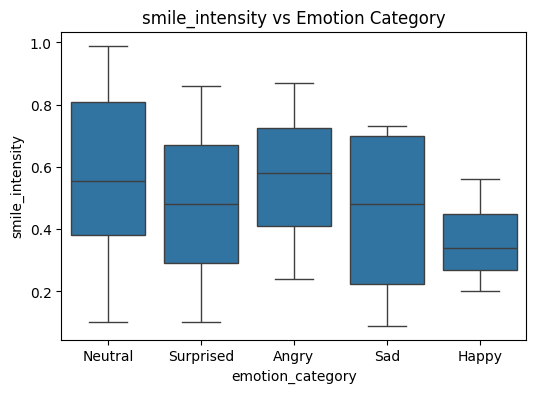

**************************************************************************


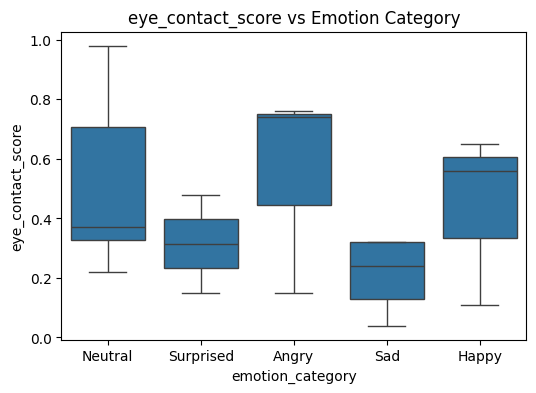

**************************************************************************


In [ ]:
features = ["extroversion_score", "confidence_level", "trustworthiness_score",
            "smile_intensity", "eye_contact_score"]

for feat in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="emotion_category", y=feat, data=df)
    plt.title(f"{feat} vs Emotion Category")
    plt.show()
    print('**************************************************************************')
    #these graphs showing how the features have the impact on the emotion category